Final model selection. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os 

# loading linear algorithms
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor

# tree based algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, r2_score, mean_absolute_error

In [2]:
 # pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
df = pd.read_csv('training_housing.csv')
df.head(10)

,Address,Subdivision Name,City,Cumulative Days On Market,Days On Market,SqFt,Fireplaces Total,Heating,Year Built,Utilities,Longitude,Latitude,HOA Fee,HOA Fee Frequency,HOA Type,Cooling,County,Covered Spaces,Carport Spaces,Close Date,Close Price,Bath Full,Baths Half,Baths Total,# Dining Areas,# Living Areas,Beds Total,Bath Total,Acres,Current Price
0,2026 Oldfield Drive,Eastcrest Park,Dallas,3,3,"1,515",0,Central,1958,"City Sewer, City Water",-96.698067,32.747027,NaN,NaN,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/28/2022,"$274,900",2,0,2/0,1,1,3,2,0.169,"$274,900"
1,12136 Madeleine Circle,Dallas Project No 1 East,Dallas,3,3,"3,335",2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96.795085,32.915152,NaN,NaN,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0.0,05/03/2022,"$1,206,000",3,1,3/1,2,2,3,4,0.248,"$1,206,000"
2,6215 Suffolk Drive,Redstone Add,Arlington,4,4,"1,860",1,Central,1987,"Asphalt, City Sewer, City Water",-97.162538,32.644153,NaN,NaN,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/23/2022,"$355,000",2,0,2/0,2,1,3,2,0.186,"$355,000"
3,2807 Jeremy Drive,Creek Crossing Estates,Mesquite,7,7,"3,039",1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96.560757,32.742026,NaN,NaN,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/25/2022,"$457,500",3,0,3/0,1,1,5,3,0.326,"$457,500"
4,9701 Lancelot Circle,Heritage Oaks Sec 1 & 2 Add,Fort Worth,3,3,"1,886",1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97.240889,32.604638,NaN,NaN,None,"Central Air, Electric",Tarrant,2,0.0,05/06/2022,"$460,000",2,1,2/1,1,1,3,3,0.664,"$460,000"
5,913 Lake View Ridge,Meadow Park Add,White Settlement,4,4,"2,288",1,Natural Gas,1964,"Asphalt, City Water, Septic",-97.465549,32.748759,NaN,NaN,None,Central Air,Tarrant,2,0.0,05/13/2022,"$263,000",2,0,2/0,1,2,3,2,0.600,"$263,000"
6,6637 Ridgetop Drive,Summer Hills Add,Watauga,4,4,"1,601",1,"Central, Fireplace(s), Natural Gas",1991,"City Sewer, City Water, Concrete, Curbs, Sidewalk",-97.239987,32.878464,NaN,NaN,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/16/2022,"$352,000",2,0,2/0,1,1,3,2,0.152,"$352,000"
7,7205 Autumn Moon Drive,Autumn Meadows Add,Forest Hill,3,3,"1,620",0,Electric,1999,"City Sewer, City Water",-97.280574,32.650933,NaN,NaN,None,Electric,Tarrant,0,0.0,04/26/2022,"$247,500",2,0,2/0,1,2,4,2,0.130,"$247,500"
8,3117 Phoenix Drive,Western Hills Add,Fort Worth,6,6,"1,854",1,Natural Gas,1956,"City Sewer, City Water, Concrete, Curbs, Individual Gas Meter, Individual Water Meter",-97.457980,32.727963,NaN,NaN,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,3,1.0,04/22/2022,"$285,000",2,0,2/0,2,2,3,2,0.269,"$285,000"
9,1134 Bellaire Drive,Bellaire Add,Grapevine,1,1,"1,350",0,"Central, Natural Gas",1953,"Cable Available, City Sewer, City Water, Concrete, Curbs, Electricity Connected, Individual Gas Meter, Individual Water Meter, Overhead Utilities",-97.081813,32.929160,NaN,NaN,None,Electric,Tarrant,0,0.0,04/25/2022,"$360,000",2,0,2/0,1,1,3,2,0.214,"$360,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Address                    4000 non-null   object 
 1   Subdivision Name           3988 non-null   object 
 2   City                       4000 non-null   object 
 3   Cumulative Days On Market  4000 non-null   int64  
 4   Days On Market             4000 non-null   int64  
 5   SqFt                       3999 non-null   object 
 6   Fireplaces Total           4000 non-null   int64  
 7   Heating                    3999 non-null   object 
 8   Year Built                 4000 non-null   int64  
 9   Utilities                  3999 non-null   object 
 10  Longitude                  4000 non-null   float64
 11  Latitude                   4000 non-null   float64
 12  HOA Fee                    1808 non-null   object 
 13  HOA Fee Frequency          1815 non-null   objec

In [5]:
df.columns

Index(['Address', 'Subdivision Name', 'City', 'Cumulative Days On Market',
       'Days On Market', 'SqFt', 'Fireplaces Total', 'Heating', 'Year Built',
       'Utilities', 'Longitude', 'Latitude', 'HOA Fee', 'HOA Fee Frequency',
       'HOA Type', 'Cooling', 'County', 'Covered Spaces', 'Carport Spaces',
       'Close Date', 'Close Price', 'Bath Full', 'Baths Half', 'Baths Total',
       '# Dining Areas', '# Living Areas', 'Beds Total', 'Bath Total', 'Acres',
       'Current Price'],
      dtype='object')

In [6]:
#Chose to drop this information because it is duplicated in the bath total column. Dropped HOA information due to null amounts.
df.drop(["HOA Fee", "HOA Fee Frequency", "Bath Full", "Baths Half", "Baths Total"], axis=1, inplace=True)
df.columns

Index(['Address', 'Subdivision Name', 'City', 'Cumulative Days On Market',
       'Days On Market', 'SqFt', 'Fireplaces Total', 'Heating', 'Year Built',
       'Utilities', 'Longitude', 'Latitude', 'HOA Type', 'Cooling', 'County',
       'Covered Spaces', 'Carport Spaces', 'Close Date', 'Close Price',
       '# Dining Areas', '# Living Areas', 'Beds Total', 'Bath Total', 'Acres',
       'Current Price'],
      dtype='object')

In [7]:
df.columns = ['address', 'subdivision_name', 'city', 'cumm_days_on_market', 'days_on_market', 'sqft', 'fireplaces_total', 'heating', 'year_built', 'utilities', 'longitude', 'latitude', 'hoa_type', 'cooling', 'county', 'covered_spaces', 'carport_spaces', 'close_date', 'close_price', 'dining_area_#', 'living_area_#', 'beds_total', 'bath_total', 'acres', 'current_price']
df.head()

,address,subdivision_name,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,2026 Oldfield Drive,Eastcrest Park,Dallas,3,3,"1,515",0,Central,1958,"City Sewer, City Water",-96.698067,32.747027,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/28/2022,"$274,900",1,1,3,2,0.169,"$274,900"
1,12136 Madeleine Circle,Dallas Project No 1 East,Dallas,3,3,"3,335",2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96.795085,32.915152,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0.0,05/03/2022,"$1,206,000",2,2,3,4,0.248,"$1,206,000"
2,6215 Suffolk Drive,Redstone Add,Arlington,4,4,"1,860",1,Central,1987,"Asphalt, City Sewer, City Water",-97.162538,32.644153,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/23/2022,"$355,000",2,1,3,2,0.186,"$355,000"
3,2807 Jeremy Drive,Creek Crossing Estates,Mesquite,7,7,"3,039",1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96.560757,32.742026,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/25/2022,"$457,500",1,1,5,3,0.326,"$457,500"
4,9701 Lancelot Circle,Heritage Oaks Sec 1 & 2 Add,Fort Worth,3,3,"1,886",1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97.240889,32.604638,None,"Central Air, Electric",Tarrant,2,0.0,05/06/2022,"$460,000",1,1,3,3,0.664,"$460,000"


In [8]:
#Correlations
corrMatrix = df.corr()
print (corrMatrix)

                     cumm_days_on_market  days_on_market  fireplaces_total  \
cumm_days_on_market             1.000000        0.463385         -0.051008   
days_on_market                  0.463385        1.000000         -0.018457   
fireplaces_total               -0.051008       -0.018457          1.000000   
year_built                      0.015203        0.005768          0.000575   
longitude                      -0.000649       -0.001130          0.001237   
latitude                        0.000187        0.008469          0.005907   
covered_spaces                 -0.012455       -0.021807          0.355102   
carport_spaces                  0.000048        0.028337         -0.015208   
dining_area_#                  -0.102216       -0.034670          0.377415   
living_area_#                  -0.000939       -0.006543          0.396665   
beds_total                      0.035006        0.015983          0.296548   
bath_total                      0.013441       -0.002198        

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              4000 non-null   object 
 1   subdivision_name     3988 non-null   object 
 2   city                 4000 non-null   object 
 3   cumm_days_on_market  4000 non-null   int64  
 4   days_on_market       4000 non-null   int64  
 5   sqft                 3999 non-null   object 
 6   fireplaces_total     4000 non-null   int64  
 7   heating              3999 non-null   object 
 8   year_built           4000 non-null   int64  
 9   utilities            3999 non-null   object 
 10  longitude            4000 non-null   float64
 11  latitude             4000 non-null   float64
 12  hoa_type             4000 non-null   object 
 13  cooling              3999 non-null   object 
 14  county               4000 non-null   object 
 15  covered_spaces       4000 non-null   i

In [10]:
df.drop(["address"], axis=1, inplace=True)
df.head()

,subdivision_name,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,Eastcrest Park,Dallas,3,3,"1,515",0,Central,1958,"City Sewer, City Water",-96.698067,32.747027,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/28/2022,"$274,900",1,1,3,2,0.169,"$274,900"
1,Dallas Project No 1 East,Dallas,3,3,"3,335",2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96.795085,32.915152,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0.0,05/03/2022,"$1,206,000",2,2,3,4,0.248,"$1,206,000"
2,Redstone Add,Arlington,4,4,"1,860",1,Central,1987,"Asphalt, City Sewer, City Water",-97.162538,32.644153,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/23/2022,"$355,000",2,1,3,2,0.186,"$355,000"
3,Creek Crossing Estates,Mesquite,7,7,"3,039",1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96.560757,32.742026,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/25/2022,"$457,500",1,1,5,3,0.326,"$457,500"
4,Heritage Oaks Sec 1 & 2 Add,Fort Worth,3,3,"1,886",1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97.240889,32.604638,None,"Central Air, Electric",Tarrant,2,0.0,05/06/2022,"$460,000",1,1,3,3,0.664,"$460,000"


In [11]:
df.drop(["subdivision_name"], axis=1, inplace=True)
df.head()

,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,Dallas,3,3,"1,515",0,Central,1958,"City Sewer, City Water",-96.698067,32.747027,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/28/2022,"$274,900",1,1,3,2,0.169,"$274,900"
1,Dallas,3,3,"3,335",2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96.795085,32.915152,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0.0,05/03/2022,"$1,206,000",2,2,3,4,0.248,"$1,206,000"
2,Arlington,4,4,"1,860",1,Central,1987,"Asphalt, City Sewer, City Water",-97.162538,32.644153,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/23/2022,"$355,000",2,1,3,2,0.186,"$355,000"
3,Mesquite,7,7,"3,039",1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96.560757,32.742026,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/25/2022,"$457,500",1,1,5,3,0.326,"$457,500"
4,Fort Worth,3,3,"1,886",1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97.240889,32.604638,None,"Central Air, Electric",Tarrant,2,0.0,05/06/2022,"$460,000",1,1,3,3,0.664,"$460,000"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 4000 non-null   object 
 1   cumm_days_on_market  4000 non-null   int64  
 2   days_on_market       4000 non-null   int64  
 3   sqft                 3999 non-null   object 
 4   fireplaces_total     4000 non-null   int64  
 5   heating              3999 non-null   object 
 6   year_built           4000 non-null   int64  
 7   utilities            3999 non-null   object 
 8   longitude            4000 non-null   float64
 9   latitude             4000 non-null   float64
 10  hoa_type             4000 non-null   object 
 11  cooling              3999 non-null   object 
 12  county               4000 non-null   object 
 13  covered_spaces       4000 non-null   int64  
 14  carport_spaces       4000 non-null   float64
 15  close_date           4000 non-null   o

In [13]:
#drop nulls
df.dropna(subset=['sqft', 'heating', 'utilities', 'longitude', 'cooling', 'carport_spaces'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 3998 non-null   object 
 1   cumm_days_on_market  3998 non-null   int64  
 2   days_on_market       3998 non-null   int64  
 3   sqft                 3998 non-null   object 
 4   fireplaces_total     3998 non-null   int64  
 5   heating              3998 non-null   object 
 6   year_built           3998 non-null   int64  
 7   utilities            3998 non-null   object 
 8   longitude            3998 non-null   float64
 9   latitude             3998 non-null   float64
 10  hoa_type             3998 non-null   object 
 11  cooling              3998 non-null   object 
 12  county               3998 non-null   object 
 13  covered_spaces       3998 non-null   int64  
 14  carport_spaces       3998 non-null   float64
 15  close_date           3998 non-null   o

In [15]:
df['close_price'] = df['close_price'].str.replace('$', '')
df['close_price'] = df['close_price'].str.replace(',', '')
df.head()

/var/folders/5f/xys93hxj6gb7ymsc8c000z5h0000gn/T/ipykernel_14886/2973259520.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['close_price'] = df['close_price'].str.replace('$', '')


,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,Dallas,3,3,"1,515",0,Central,1958,"City Sewer, City Water",-96.698067,32.747027,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/28/2022,274900,1,1,3,2,0.169,"$274,900"
1,Dallas,3,3,"3,335",2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96.795085,32.915152,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0.0,05/03/2022,1206000,2,2,3,4,0.248,"$1,206,000"
2,Arlington,4,4,"1,860",1,Central,1987,"Asphalt, City Sewer, City Water",-97.162538,32.644153,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/23/2022,355000,2,1,3,2,0.186,"$355,000"
3,Mesquite,7,7,"3,039",1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96.560757,32.742026,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/25/2022,457500,1,1,5,3,0.326,"$457,500"
4,Fort Worth,3,3,"1,886",1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97.240889,32.604638,None,"Central Air, Electric",Tarrant,2,0.0,05/06/2022,460000,1,1,3,3,0.664,"$460,000"


In [16]:
df['current_price'] = df['current_price'].str.replace('$', '')
df['current_price'] = df['current_price'].str.replace(',', '')
df.head()

/var/folders/5f/xys93hxj6gb7ymsc8c000z5h0000gn/T/ipykernel_14886/1500910241.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['current_price'] = df['current_price'].str.replace('$', '')


,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,Dallas,3,3,"1,515",0,Central,1958,"City Sewer, City Water",-96.698067,32.747027,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/28/2022,274900,1,1,3,2,0.169,274900
1,Dallas,3,3,"3,335",2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96.795085,32.915152,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0.0,05/03/2022,1206000,2,2,3,4,0.248,1206000
2,Arlington,4,4,"1,860",1,Central,1987,"Asphalt, City Sewer, City Water",-97.162538,32.644153,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/23/2022,355000,2,1,3,2,0.186,355000
3,Mesquite,7,7,"3,039",1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96.560757,32.742026,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/25/2022,457500,1,1,5,3,0.326,457500
4,Fort Worth,3,3,"1,886",1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97.240889,32.604638,None,"Central Air, Electric",Tarrant,2,0.0,05/06/2022,460000,1,1,3,3,0.664,460000


In [17]:
df['sqft'] = df['sqft'].str.replace(',', '')
df.head()

,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,Dallas,3,3,1515,0,Central,1958,"City Sewer, City Water",-96.698067,32.747027,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/28/2022,274900,1,1,3,2,0.169,274900
1,Dallas,3,3,3335,2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96.795085,32.915152,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0.0,05/03/2022,1206000,2,2,3,4,0.248,1206000
2,Arlington,4,4,1860,1,Central,1987,"Asphalt, City Sewer, City Water",-97.162538,32.644153,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/23/2022,355000,2,1,3,2,0.186,355000
3,Mesquite,7,7,3039,1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96.560757,32.742026,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/25/2022,457500,1,1,5,3,0.326,457500
4,Fort Worth,3,3,1886,1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97.240889,32.604638,None,"Central Air, Electric",Tarrant,2,0.0,05/06/2022,460000,1,1,3,3,0.664,460000


In [18]:
#sqft, close price, current price, longitude, latitude, carport spaces, acres to integer
df.sqft = pd.to_numeric(df.sqft, errors='coerce').fillna(0).astype(np.int64)
df.close_price = pd.to_numeric(df.close_price, errors='coerce').fillna(0).astype(np.int64)
df.current_price = pd.to_numeric(df.current_price, errors='coerce').fillna(0).astype(np.int64)
df.longitude = pd.to_numeric(df.longitude, errors='coerce').fillna(0).astype(np.int64)
df.latitude = pd.to_numeric(df.latitude, errors='coerce').fillna(0).astype(np.int64)
df.carport_spaces = pd.to_numeric(df.carport_spaces, errors='coerce').fillna(0).astype(np.int64)
df.acres = pd.to_numeric(df.acres, errors='coerce').fillna(0).astype(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 3998 non-null   object
 1   cumm_days_on_market  3998 non-null   int64 
 2   days_on_market       3998 non-null   int64 
 3   sqft                 3998 non-null   int64 
 4   fireplaces_total     3998 non-null   int64 
 5   heating              3998 non-null   object
 6   year_built           3998 non-null   int64 
 7   utilities            3998 non-null   object
 8   longitude            3998 non-null   int64 
 9   latitude             3998 non-null   int64 
 10  hoa_type             3998 non-null   object
 11  cooling              3998 non-null   object
 12  county               3998 non-null   object
 13  covered_spaces       3998 non-null   int64 
 14  carport_spaces       3998 non-null   int64 
 15  close_date           3998 non-null   object
 16  close_

In [19]:
#close date to date time
df.close_date = pd.to_datetime(df.close_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   city                 3998 non-null   object        
 1   cumm_days_on_market  3998 non-null   int64         
 2   days_on_market       3998 non-null   int64         
 3   sqft                 3998 non-null   int64         
 4   fireplaces_total     3998 non-null   int64         
 5   heating              3998 non-null   object        
 6   year_built           3998 non-null   int64         
 7   utilities            3998 non-null   object        
 8   longitude            3998 non-null   int64         
 9   latitude             3998 non-null   int64         
 10  hoa_type             3998 non-null   object        
 11  cooling              3998 non-null   object        
 12  county               3998 non-null   object        
 13  covered_spaces       3998 non-nul

In [20]:
df.head()

,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,Dallas,3,3,1515,0,Central,1958,"City Sewer, City Water",-96,32,None,"Ceiling Fan(s), Central Air",Dallas,2,0,2022-04-28,274900,1,1,3,2,0,274900
1,Dallas,3,3,3335,2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96,32,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0,2022-05-03,1206000,2,2,3,4,0,1206000
2,Arlington,4,4,1860,1,Central,1987,"Asphalt, City Sewer, City Water",-97,32,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0,2022-05-23,355000,2,1,3,2,0,355000
3,Mesquite,7,7,3039,1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96,32,None,"Ceiling Fan(s), Central Air",Dallas,2,0,2022-04-25,457500,1,1,5,3,0,457500
4,Fort Worth,3,3,1886,1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97,32,None,"Central Air, Electric",Tarrant,2,0,2022-05-06,460000,1,1,3,3,0,460000


In [21]:
# divide data up into categorical and numerical data
cols_str = []
cols_num = []
for col in df.columns:
    if df[col].dtype == 'object':
        cols_str.append(col)
    else:
        cols_num.append(col)

In [22]:
df_str = df.loc[:, cols_str]
df_str.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city       3998 non-null   object
 1   heating    3998 non-null   object
 2   utilities  3998 non-null   object
 3   hoa_type   3998 non-null   object
 4   cooling    3998 non-null   object
 5   county     3998 non-null   object
dtypes: object(6)
memory usage: 218.6+ KB


In [23]:
for col in df_str.columns:
    print(col)
    print(df_str[col].nunique())
    print()

city
113

heating
168

utilities
1316

hoa_type
3

cooling
156

county
7



In [24]:
#one hot encoding
df_oh = pd.get_dummies(df_str.loc[:, ["county", "hoa_type"]])
df_oh.head()

,county_Collin,county_Dallas,county_Ellis,county_Hunt,county_Kaufman,county_Rockwall,county_Tarrant,hoa_type_Mandatory,hoa_type_None,hoa_type_Voluntary
0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,1,0


In [25]:
#label encoding
cols_le = ["city", "heating", "utilities"]
df_le = df_str.loc[:, cols_le]

le2 = LabelEncoder().fit(df_le["city"])
le3 = LabelEncoder().fit(df_le["heating"])
le4 = LabelEncoder().fit(df_le["utilities"])

df_le["city_le"] = le2.transform(df_le["city"])
df_le["heating_le"] = le3.transform(df_le["heating"])
df_le["utilities_le"] = le4.transform(df_le["utilities"])

df_le.head()

,city,heating,utilities,city_le,heating_le,utilities_le
0,Dallas,Central,"City Sewer, City Water",20,9,922
1,Dallas,"Central, Natural Gas, Zoned","City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",20,101,1082
2,Arlington,Central,"Asphalt, City Sewer, City Water",3,9,543
3,Mesquite,Natural Gas,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",70,153,1160
4,Fort Worth,"Central, Electric","City Sewer, City Water, Concrete",35,32,977


In [26]:
df_le.drop(["city", "heating", "utilities"], axis=1, inplace=True)
df_le.head()

,city_le,heating_le,utilities_le
0,20,9,922
1,20,101,1082
2,3,9,543
3,70,153,1160
4,35,32,977


In [27]:
df_encoded = pd.concat([df_oh, df_le], axis=1)
df_encoded.head()

,county_Collin,county_Dallas,county_Ellis,county_Hunt,county_Kaufman,county_Rockwall,county_Tarrant,hoa_type_Mandatory,hoa_type_None,hoa_type_Voluntary,city_le,heating_le,utilities_le
0,0,1,0,0,0,0,0,0,1,0,20,9,922
1,0,1,0,0,0,0,0,0,1,0,20,101,1082
2,0,0,0,0,0,0,1,0,1,0,3,9,543
3,0,1,0,0,0,0,0,0,1,0,70,153,1160
4,0,0,0,0,0,0,1,0,1,0,35,32,977


In [28]:
df_num = df.loc[:, cols_num]
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cumm_days_on_market  3998 non-null   int64         
 1   days_on_market       3998 non-null   int64         
 2   sqft                 3998 non-null   int64         
 3   fireplaces_total     3998 non-null   int64         
 4   year_built           3998 non-null   int64         
 5   longitude            3998 non-null   int64         
 6   latitude             3998 non-null   int64         
 7   covered_spaces       3998 non-null   int64         
 8   carport_spaces       3998 non-null   int64         
 9   close_date           3998 non-null   datetime64[ns]
 10  close_price          3998 non-null   int64         
 11  dining_area_#        3998 non-null   int64         
 12  living_area_#        3998 non-null   int64         
 13  beds_total           3998 non-nul

In [29]:
df_date = df_num.close_date
df_date.head()

0   2022-04-28
1   2022-05-03
2   2022-05-23
3   2022-04-25
4   2022-05-06
Name: close_date, dtype: datetime64[ns]

In [30]:
df_num.drop(["close_date"], axis=1, inplace=True)


In [31]:
df_complete = pd.concat([df_encoded, df_num], axis = 1)
df_complete.head()

,county_Collin,county_Dallas,county_Ellis,county_Hunt,county_Kaufman,county_Rockwall,county_Tarrant,hoa_type_Mandatory,hoa_type_None,hoa_type_Voluntary,city_le,heating_le,utilities_le,cumm_days_on_market,days_on_market,sqft,fireplaces_total,year_built,longitude,latitude,covered_spaces,carport_spaces,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,0,1,0,0,0,0,0,0,1,0,20,9,922,3,3,1515,0,1958,-96,32,2,0,274900,1,1,3,2,0,274900
1,0,1,0,0,0,0,0,0,1,0,20,101,1082,3,3,3335,2,1991,-96,32,2,0,1206000,2,2,3,4,0,1206000
2,0,0,0,0,0,0,1,0,1,0,3,9,543,4,4,1860,1,1987,-97,32,2,0,355000,2,1,3,2,0,355000
3,0,1,0,0,0,0,0,0,1,0,70,153,1160,7,7,3039,1,1999,-96,32,2,0,457500,1,1,5,3,0,457500
4,0,0,0,0,0,0,1,0,1,0,35,32,977,3,3,1886,1,2022,-97,32,2,0,460000,1,1,3,3,0,460000


In [32]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   county_Collin        3998 non-null   uint8
 1   county_Dallas        3998 non-null   uint8
 2   county_Ellis         3998 non-null   uint8
 3   county_Hunt          3998 non-null   uint8
 4   county_Kaufman       3998 non-null   uint8
 5   county_Rockwall      3998 non-null   uint8
 6   county_Tarrant       3998 non-null   uint8
 7   hoa_type_Mandatory   3998 non-null   uint8
 8   hoa_type_None        3998 non-null   uint8
 9   hoa_type_Voluntary   3998 non-null   uint8
 10  city_le              3998 non-null   int64
 11  heating_le           3998 non-null   int64
 12  utilities_le         3998 non-null   int64
 13  cumm_days_on_market  3998 non-null   int64
 14  days_on_market       3998 non-null   int64
 15  sqft                 3998 non-null   int64
 16  fireplaces_total     399

In [33]:
corrs = abs(df_complete.corr())["days_on_market"].sort_values(ascending=False)
corrs

days_on_market         1.000000
cumm_days_on_market    0.462612
acres                  0.058415
close_price            0.042566
current_price          0.042539
county_Hunt            0.039602
county_Kaufman         0.035678
dining_area_#          0.033777
county_Tarrant         0.031039
county_Ellis           0.030822
carport_spaces         0.028768
heating_le             0.027892
county_Rockwall        0.025782
covered_spaces         0.021955
city_le                0.021389
fireplaces_total       0.018866
beds_total             0.016929
county_Dallas          0.014752
latitude               0.011113
utilities_le           0.010789
hoa_type_Voluntary     0.006407
year_built             0.005566
living_area_#          0.005556
hoa_type_None          0.005401
hoa_type_Mandatory     0.003480
county_Collin          0.002855
bath_total             0.001398
sqft                   0.000169
longitude              0.000072
Name: days_on_market, dtype: float64

In [34]:
corrs = abs(df_complete.corr())["cumm_days_on_market"].sort_values(ascending=False)
corrs

cumm_days_on_market    1.000000
days_on_market         0.462612
dining_area_#          0.101849
county_Ellis           0.066014
fireplaces_total       0.051194
county_Kaufman         0.044164
county_Rockwall        0.036207
beds_total             0.035425
utilities_le           0.033236
close_price            0.031954
current_price          0.031938
county_Dallas          0.026643
hoa_type_Mandatory     0.026032
county_Collin          0.025728
city_le                0.025053
hoa_type_None          0.021494
acres                  0.018925
year_built             0.015111
hoa_type_Voluntary     0.014599
bath_total             0.013802
county_Tarrant         0.013243
covered_spaces         0.012504
county_Hunt            0.008640
heating_le             0.008132
sqft                   0.002967
longitude              0.002195
latitude               0.001567
living_area_#          0.000499
carport_spaces         0.000209
Name: cumm_days_on_market, dtype: float64

In [35]:
#Chosen for prediction
corrs = abs(df_complete.corr())["close_price"].sort_values(ascending=False)
corrs

close_price            1.000000
current_price          0.999997
sqft                   0.772164
bath_total             0.702441
fireplaces_total       0.553050
living_area_#          0.487581
beds_total             0.416192
dining_area_#          0.327701
covered_spaces         0.326938
hoa_type_None          0.173545
county_Collin          0.151227
hoa_type_Mandatory     0.149809
county_Tarrant         0.144492
heating_le             0.113432
utilities_le           0.100452
county_Dallas          0.093958
county_Kaufman         0.087135
hoa_type_Voluntary     0.080842
county_Hunt            0.075145
acres                  0.068089
county_Ellis           0.051064
days_on_market         0.042566
city_le                0.040712
longitude              0.032042
cumm_days_on_market    0.031954
latitude               0.027065
year_built             0.015506
carport_spaces         0.010501
county_Rockwall        0.006311
Name: close_price, dtype: float64

In [36]:
#removing features
cols = list(corrs.loc[corrs <=0.1].index)
cols

['county_Dallas',
 'county_Kaufman',
 'hoa_type_Voluntary',
 'county_Hunt',
 'acres',
 'county_Ellis',
 'days_on_market',
 'city_le',
 'longitude',
 'cumm_days_on_market',
 'latitude',
 'year_built',
 'carport_spaces',
 'county_Rockwall']

In [37]:
#remove features unless part of one hot encoded data (Removing current price because too closely correlated to prediction.)
df_complete.drop(["current_price", "utilities_le", "acres", "longitude", "latitude", "days_on_market", "year_built", "carport_spaces", "heating_le", "covered_spaces", "fireplaces_total", "cumm_days_on_market", "dining_area_#", "living_area_#"], axis=1, inplace=True)
df_complete.columns

Index(['county_Collin', 'county_Dallas', 'county_Ellis', 'county_Hunt',
       'county_Kaufman', 'county_Rockwall', 'county_Tarrant',
       'hoa_type_Mandatory', 'hoa_type_None', 'hoa_type_Voluntary', 'city_le',
       'sqft', 'close_price', 'beds_total', 'bath_total'],
      dtype='object')

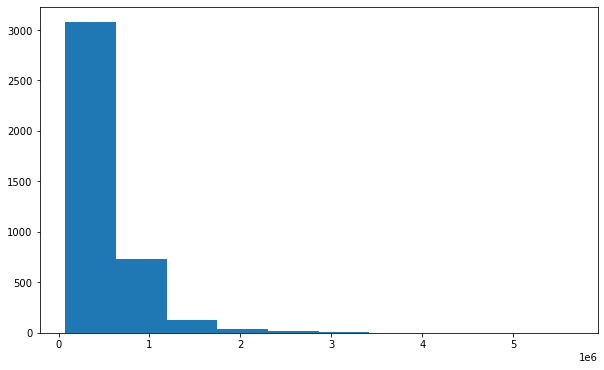

In [38]:
plt.figure(figsize=(10,6))
plt.hist(df_complete["close_price"])
plt.show()

In [39]:
# get features and target
X = df_complete.drop("close_price", axis=1).values
y = df_complete["close_price"].values

In [40]:
df_complete.columns

Index(['county_Collin', 'county_Dallas', 'county_Ellis', 'county_Hunt',
       'county_Kaufman', 'county_Rockwall', 'county_Tarrant',
       'hoa_type_Mandatory', 'hoa_type_None', 'hoa_type_Voluntary', 'city_le',
       'sqft', 'close_price', 'beds_total', 'bath_total'],
      dtype='object')

In [41]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.7498749374687343
0.25012506253126565


In [42]:
# this function takes in a model algorithm and the training data and prints graphs and metrics
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, test_preds)
    plt.title("Actual vs Predicted Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot(y_test, y_test)
    plt.show()
    
    # Plot Residuals
    plt.figure(figsize=(10,6))
    plt.scatter(test_preds, test_preds - y_test)
    plt.hlines(y=0, xmin=test_preds.min(), xmax=test_preds.max(), color="r")
    plt.title("Residuals")
    plt.xlabel("Prediction")
    plt.ylabel("Error")
    plt.show()

    return(model)

TRAINING SET
root mean squared error (RMSE): 223441.85116482817
R-squared (R2 ): 0.661672241368541
MAE 137747.16998629872

Testing SET
root mean squared error (RMSE): 204442.0604732107
R-squared (R2 ): 0.6475706895614196
MAE 130897.5143256531


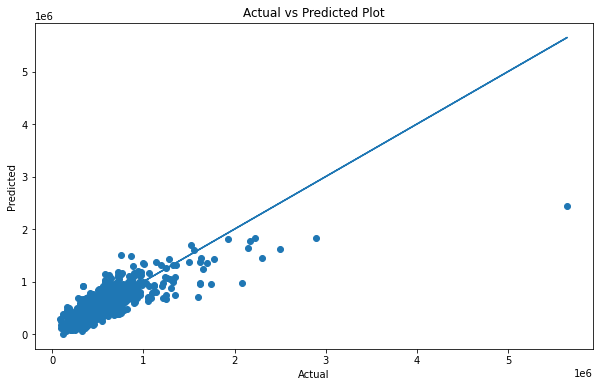

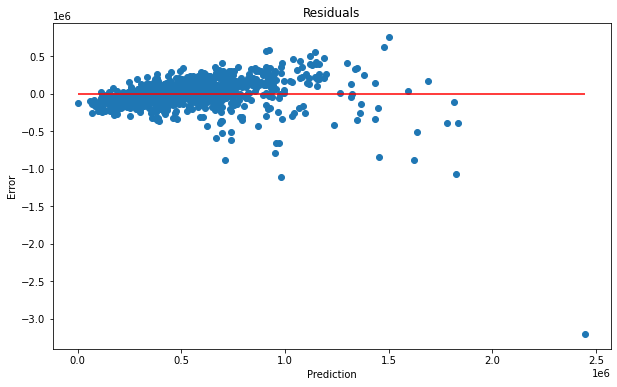

In [43]:
lr = LinearRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 223441.95009210668
R-squared (R2 ): 0.661671941784093
MAE 137728.31479737334

Testing SET
root mean squared error (RMSE): 204432.47894558185
R-squared (R2 ): 0.6476037231948837
MAE 130874.43022704127


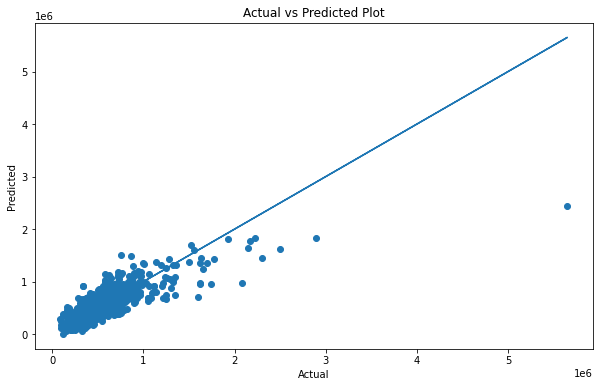

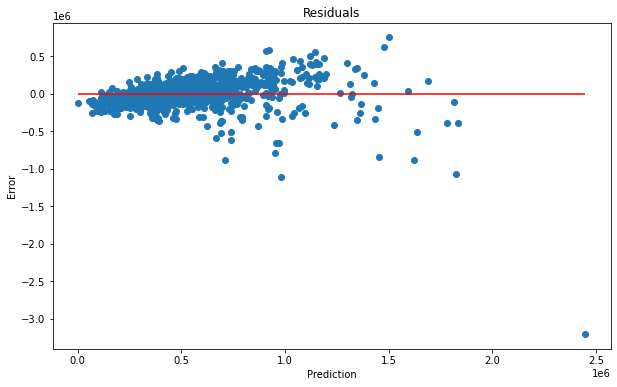

In [44]:
ridge = Ridge()
ridge = evaluateModel(ridge, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 223441.85164930276
R-squared (R2 ): 0.6616722399013923
MAE 137746.16861313244

Testing SET
root mean squared error (RMSE): 204441.37125109663
R-squared (R2 ): 0.6475730658010681
MAE 130896.03971175068


/Users/serendipitousfun/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7760452090766.219, tolerance: 44240806796.23965
  model = cd_fast.enet_coordinate_descent(


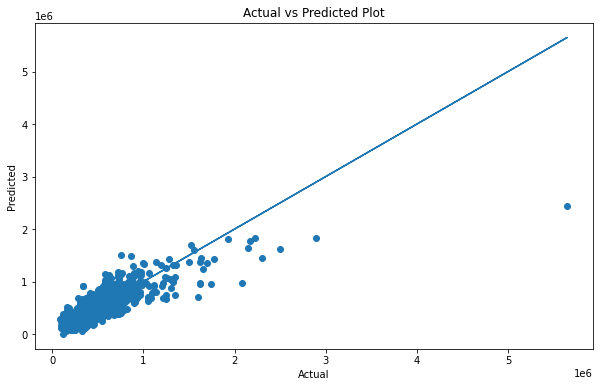

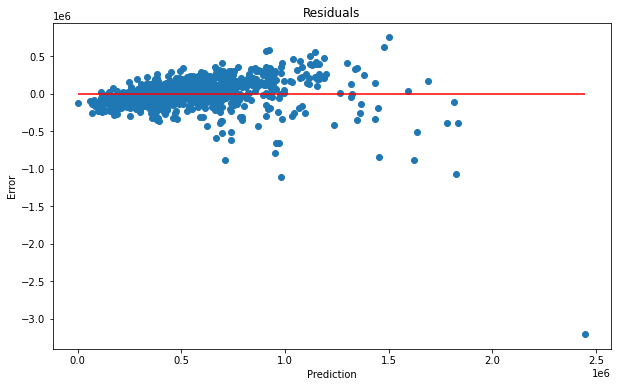

In [45]:
lasso = Lasso()
lasso = evaluateModel(lasso, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 231102.9251355663
R-squared (R2 ): 0.638074256574718
MAE 133819.08795120538

Testing SET
root mean squared error (RMSE): 209010.8831634234
R-squared (R2 ): 0.6316426651086102
MAE 127314.4386452259


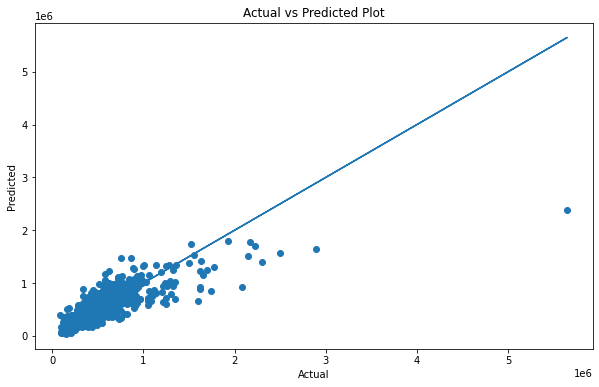

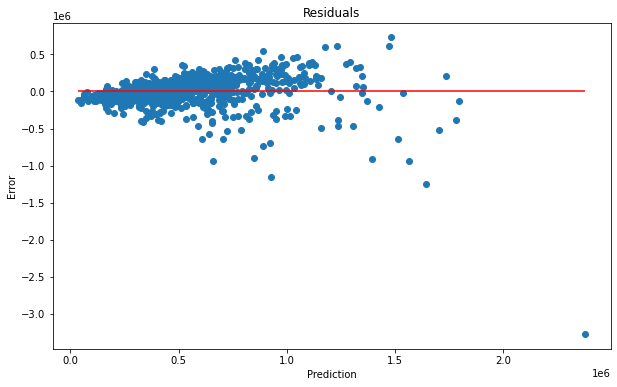

In [46]:
en = ElasticNet()
en = evaluateModel(en, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 12638.035645451631
R-squared (R2 ): 0.9989176499487394
MAE 1239.2969757616188

Testing SET
root mean squared error (RMSE): 259337.06076314545
R-squared (R2 ): 0.43289863811993534
MAE 135801.05966666667


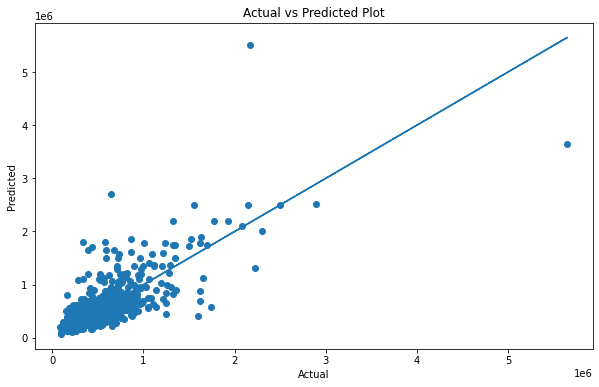

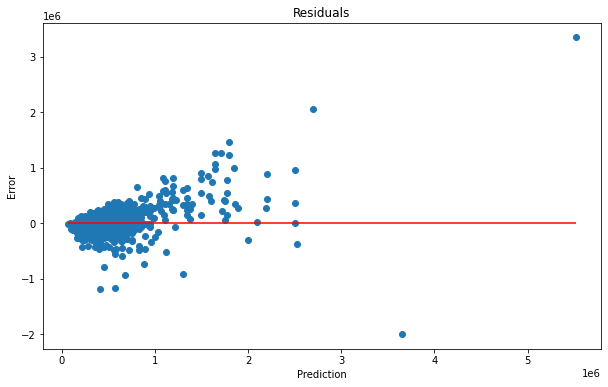

In [47]:
dt = DecisionTreeRegressor()
dt = evaluateModel(dt, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 66538.79169925353
R-squared (R2 ): 0.9699974332703251
MAE 36497.83502783602

Testing SET
root mean squared error (RMSE): 193594.60945530995
R-squared (R2 ): 0.6839774724049585
MAE 103234.84099870635


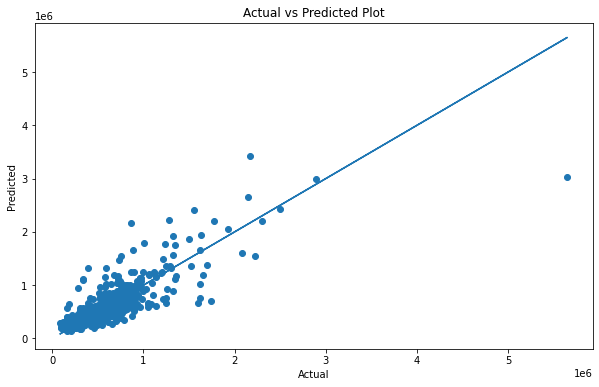

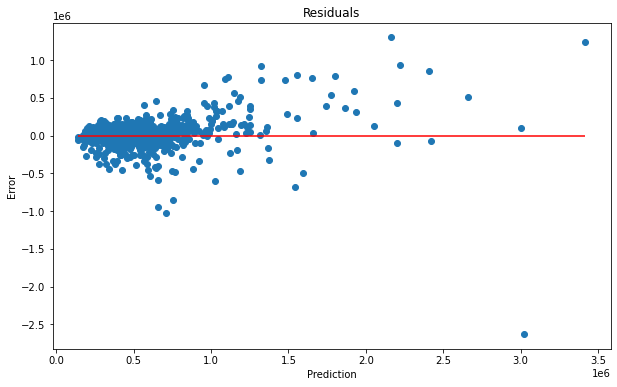

In [48]:
rf = RandomForestRegressor()
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

In [49]:
test1= df_complete.drop("close_price", axis=1)
list(zip(test1.columns, rf.feature_importances_))

[('county_Collin', 0.012280855916218244),
 ('county_Dallas', 0.02572852917994285),
 ('county_Ellis', 0.000760573265036233),
 ('county_Hunt', 0.0005560152230782685),
 ('county_Kaufman', 0.0003913458208665745),
 ('county_Rockwall', 0.0010372644794536382),
 ('county_Tarrant', 0.005331699013105994),
 ('hoa_type_Mandatory', 0.048329689925264624),
 ('hoa_type_None', 0.019931787553969543),
 ('hoa_type_Voluntary', 0.0013398624155018292),
 ('city_le', 0.08344866116787461),
 ('sqft', 0.7423063717324684),
 ('beds_total', 0.022049575603107982),
 ('bath_total', 0.036507768704111265)]

TRAINING SET
root mean squared error (RMSE): 12639.4414646144
R-squared (R2 ): 0.9989174091402604
MAE 1257.9107182566152

Testing SET
root mean squared error (RMSE): 203669.52087557997
R-squared (R2 ): 0.650229156047873
MAE 110718.29194166666


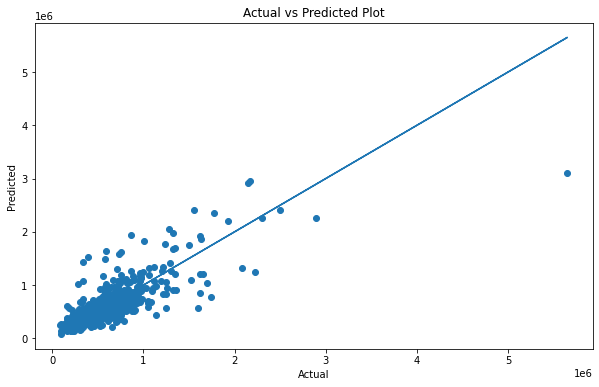

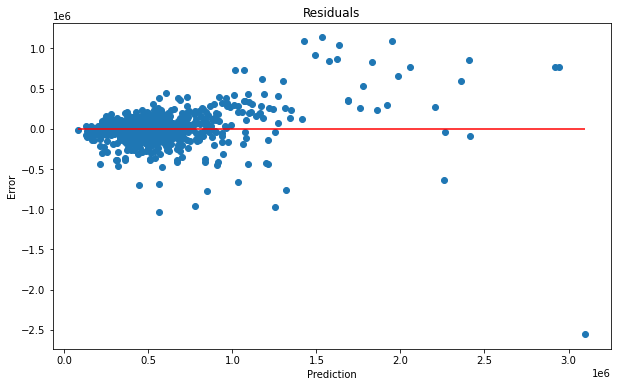

In [50]:
et = ExtraTreesRegressor(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test) 

In [51]:
test2= df_complete.drop("close_price", axis=1)
list(zip(test2.columns, et.feature_importances_))

[('county_Collin', 0.014525508443854706),
 ('county_Dallas', 0.03630064659115569),
 ('county_Ellis', 0.0014765331230454717),
 ('county_Hunt', 0.0006804362944273923),
 ('county_Kaufman', 0.0007382291699708045),
 ('county_Rockwall', 0.002258047264459729),
 ('county_Tarrant', 0.010657466374245377),
 ('hoa_type_Mandatory', 0.040360044427537455),
 ('hoa_type_None', 0.03483118383312644),
 ('hoa_type_Voluntary', 0.0030013320504971752),
 ('city_le', 0.07372574359563083),
 ('sqft', 0.5179331270127528),
 ('beds_total', 0.04561592312717316),
 ('bath_total', 0.21789577869212282)]

TRAINING SET
root mean squared error (RMSE): 228126.39886885838
R-squared (R2 ): 0.6473371767529338
MAE 184147.191768057

Testing SET
root mean squared error (RMSE): 240152.40785326832
R-squared (R2 ): 0.5136987205131837
MAE 180990.8911778026


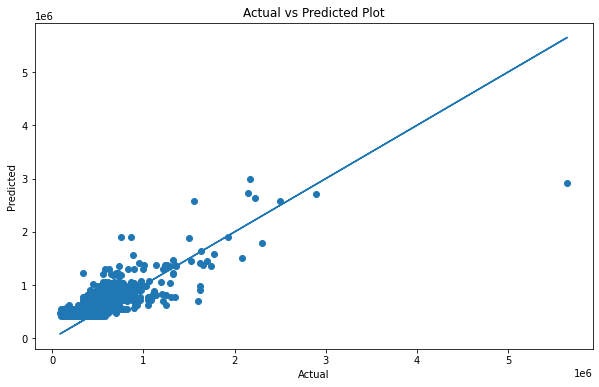

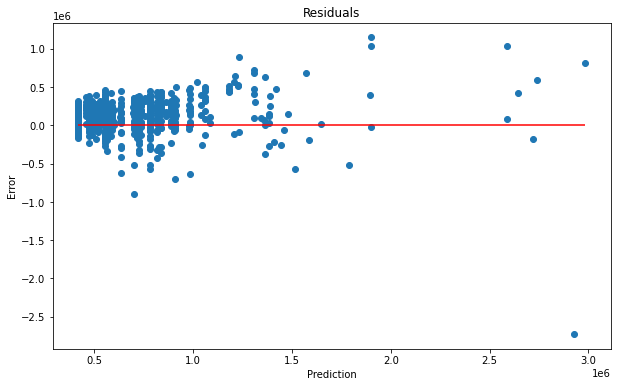

In [52]:
ada = AdaBoostRegressor(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 140235.1009060447
R-squared (R2 ): 0.8667331744584172
MAE 86233.19742179006

Testing SET
root mean squared error (RMSE): 174311.68321288427
R-squared (R2 ): 0.7437968207423794
MAE 96790.73900383728


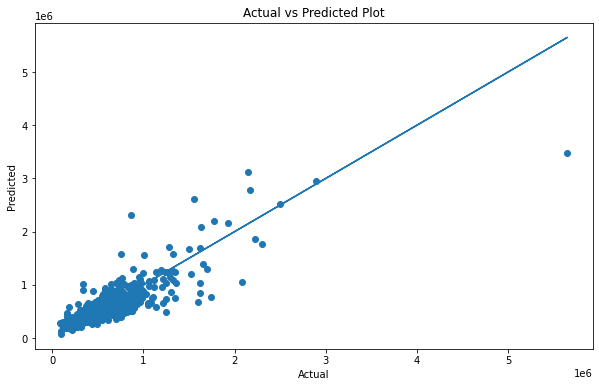

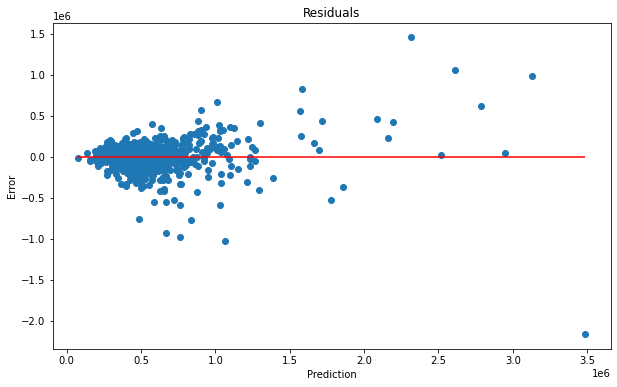

In [53]:
gb = GradientBoostingRegressor(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

In [54]:
test3= df_complete.drop("close_price", axis=1)
list(zip(test3.columns, gb.feature_importances_))

[('county_Collin', 0.009056191634590802),
 ('county_Dallas', 0.027935349514446095),
 ('county_Ellis', 0.00041907722547294843),
 ('county_Hunt', 0.0005577585963130482),
 ('county_Kaufman', 0.00040463738095170986),
 ('county_Rockwall', 0.0),
 ('county_Tarrant', 0.00422315873406976),
 ('hoa_type_Mandatory', 0.04218698428473547),
 ('hoa_type_None', 0.023557380862155006),
 ('hoa_type_Voluntary', 0.0007433740569235571),
 ('city_le', 0.06064598711403571),
 ('sqft', 0.687088362165209),
 ('beds_total', 0.020865035417702384),
 ('bath_total', 0.12231670301339445)]

TRAINING SET
root mean squared error (RMSE): 61240.43530384919
R-squared (R2 ): 0.9745852917679203
MAE 40694.2017334473

Testing SET
root mean squared error (RMSE): 176583.88569153106
R-squared (R2 ): 0.7370739240964773
MAE 96863.882640625


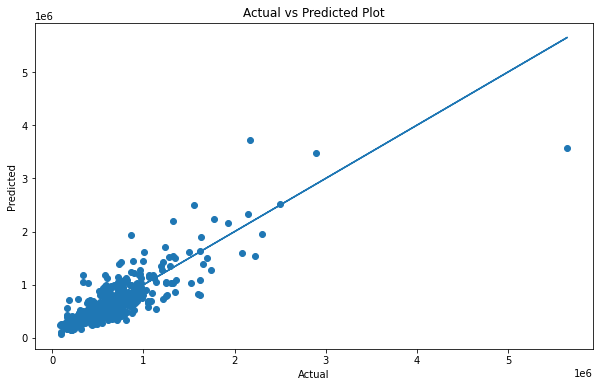

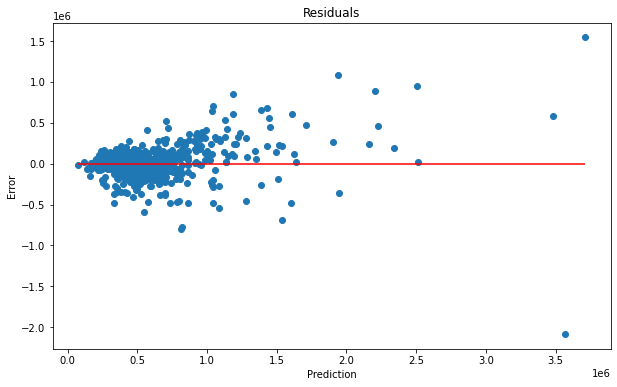

In [55]:
xgb = XGBRegressor(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

Model Selection

In [56]:
#Chose GB Regressor

METRICS
root mean squared error (RMSE): 140428.53484351127
R-squared (R2 ): 0.8594944814377807
MAE 86486.61551417079


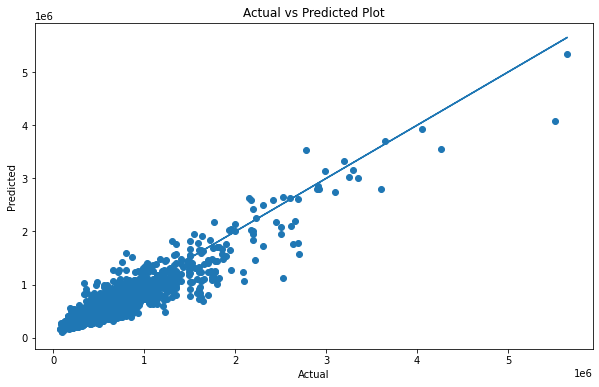

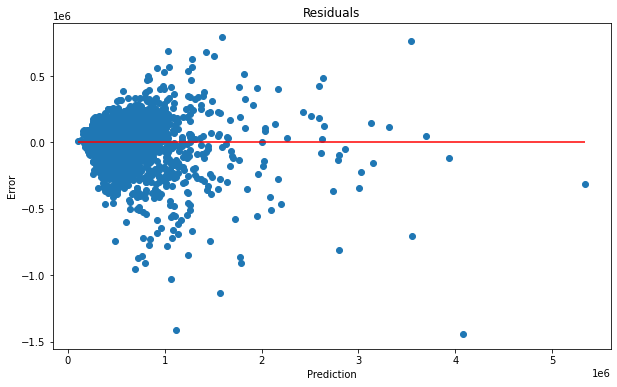

In [57]:
# run the model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X, y)

#get predictions
in_sample_preds = gb.predict(X)

# PRINT the METRICS
print("METRICS")

# Score the prediction with MSE and R2
mse = np.sqrt(mean_squared_error(y, in_sample_preds))
r2 = r2_score(y, in_sample_preds)
mae = mean_absolute_error(y, in_sample_preds)

print(f"root mean squared error (RMSE): {mse}")
print(f"R-squared (R2 ): {r2}")
print(f"MAE {mae}")

plt.figure(figsize=(10,6))
plt.scatter(y, in_sample_preds)
plt.title("Actual vs Predicted Plot")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot(y, y)
plt.show()

# Plot Residuals
plt.figure(figsize=(10,6))
plt.scatter(in_sample_preds, in_sample_preds - y)
plt.hlines(y=0, xmin=in_sample_preds.min(), xmax=in_sample_preds.max(), color="r")
plt.title("Residuals")
plt.xlabel("Prediction")
plt.ylabel("Error")
plt.show()

In [58]:
import pickle 

In [59]:
 # save the model to disk
filename = 'finalized_model_gboption.sav'
pickle.dump(gb, open(filename, 'wb'))

Testing data preparation

In [60]:
test_df = pd.read_csv('testing_housing.csv')
test_df.head(10)

,Address,Subdivision Name,City,Cumulative Days On Market,Days On Market,SqFt,Fireplaces Total,Heating,Year Built,Utilities,Longitude,Latitude,HOA Fee,HOA Fee Frequency,HOA Type,Cooling,County,Covered Spaces,Carport Spaces,Close Date,Close Price,Bath Full,Baths Half,Baths Total,# Dining Areas,# Living Areas,Beds Total,Bath Total,Acres,Current Price
0,6738 State Highway 50 Highway,J. Hart,Commerce,4,4,"1,224",0,"Propane, Wood Stove",1960,"Cable Available, Rural Water District, Septic",-95.896170,33.276387,NaN,NaN,None,Window Unit(s),Hunt,2,2.0,04/14/2022,"$114,000",1,0,1/0,1,1,3,1,1.000,"$114,000"
1,303 E 7th Street,Snow 2,Kaufman,36,36,"1,242",0,"Central, Electric",1960,"Cable Available, City Sewer, City Water",-96.307192,32.580489,NaN,NaN,None,"Ceiling Fan(s), Central Air, Electric",Kaufman,0,0.0,05/03/2022,"$115,000",1,0,1/0,1,1,3,1,0.152,"$115,000"
2,99 Lewis Street,Park Hill-Rev,Waxahachie,6,6,"1,848",0,"Central, Electric",1975,"City Sewer, City Water",-96.829986,32.388930,NaN,NaN,None,"Central Air, Electric",Ellis,0,0.0,05/12/2022,"$115,000",2,0,2/0,1,1,4,2,0.206,"$115,000"
3,3710 E 1st Street,Riverside Add,Fort Worth,4,4,904,0,None,1912,"City Sewer, City Water",-97.293733,32.764938,NaN,NaN,None,None,Tarrant,0,0.0,04/25/2022,"$120,000",1,0,1/0,1,1,3,1,0.229,"$120,000"
4,1242 Coleman Street,Barnhardt Rsb-B-6 Woolen Mill,Greenville,3,3,"1,132",0,Central,1962,"Cable Available, City Sewer, City Water, Individual Gas Meter",-96.096968,33.124482,NaN,NaN,None,Central Air,Hunt,1,1.0,05/17/2022,"$120,000",1,0,1/0,1,1,3,1,0.140,"$120,000"
5,2830 Tanner Street,English Place,Dallas,2,2,"1,248",0,None,2017,"City Sewer, City Water, Electricity Available",-96.763076,32.766123,NaN,NaN,None,None,Dallas,0,0.0,04/22/2022,"$130,000",2,0,2/0,1,1,3,2,0.126,"$130,000"
6,3042 Britton Drive,Brightside,Dallas,9,9,"1,032",0,None,1940,"City Sewer, City Water",-96.804913,32.709069,NaN,NaN,None,None,Dallas,0,0.0,04/18/2022,"$140,000",1,0,1/0,1,1,3,1,0.175,"$140,000"
7,2915 Crenshaw Avenue,Burchill Add,Fort Worth,7,7,"1,790",0,Wall Furnace,1952,"City Sewer, City Water",-97.283054,32.718331,NaN,NaN,None,"Ceiling Fan(s), Wall/Window Unit(s)",Tarrant,0,0.0,04/28/2022,"$140,000",2,0,2/0,1,2,3,2,0.161,"$140,000"
8,3708 Avenue N,Raef Sub,Fort Worth,25,25,850,0,Space Heater,1942,"Cable Available, City Sewer, City Water",-97.270480,32.723249,NaN,NaN,None,"Ceiling Fan(s), Window Unit(s)",Tarrant,1,1.0,05/20/2022,"$140,000",1,0,1/0,0,1,2,1,0.144,"$140,000"
9,2967 50th Street,Sunnyvale,Dallas,6,6,"1,248",0,Central,1954,"City Sewer, City Water",-96.772671,32.700195,NaN,NaN,None,Central Air,Dallas,0,0.0,05/17/2022,"$145,000",1,0,1/0,1,1,3,1,0.179,"$145,000"


In [61]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Address                    1000 non-null   object 
 1   Subdivision Name           998 non-null    object 
 2   City                       1000 non-null   object 
 3   Cumulative Days On Market  1000 non-null   int64  
 4   Days On Market             1000 non-null   int64  
 5   SqFt                       1000 non-null   object 
 6   Fireplaces Total           1000 non-null   int64  
 7   Heating                    1000 non-null   object 
 8   Year Built                 1000 non-null   int64  
 9   Utilities                  1000 non-null   object 
 10  Longitude                  999 non-null    float64
 11  Latitude                   1000 non-null   float64
 12  HOA Fee                    429 non-null    object 
 13  HOA Fee Frequency          429 non-null    object

In [62]:
test_df.drop(["HOA Fee", "HOA Fee Frequency", "Bath Full", "Baths Half", "Baths Total"], axis=1, inplace=True)
test_df.columns

Index(['Address', 'Subdivision Name', 'City', 'Cumulative Days On Market',
       'Days On Market', 'SqFt', 'Fireplaces Total', 'Heating', 'Year Built',
       'Utilities', 'Longitude', 'Latitude', 'HOA Type', 'Cooling', 'County',
       'Covered Spaces', 'Carport Spaces', 'Close Date', 'Close Price',
       '# Dining Areas', '# Living Areas', 'Beds Total', 'Bath Total', 'Acres',
       'Current Price'],
      dtype='object')

In [63]:
test_df.columns = ['address', 'subdivision_name', 'city', 'cumm_days_on_market', 'days_on_market', 'sqft', 'fireplaces_total', 'heating', 'year_built', 'utilities', 'longitude', 'latitude', 'hoa_type', 'cooling', 'county', 'covered_spaces', 'carport_spaces', 'close_date', 'close_price', 'dining_area_#', 'living_area_#', 'beds_total', 'bath_total', 'acres', 'current_price']
test_df.head()

,address,subdivision_name,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,6738 State Highway 50 Highway,J. Hart,Commerce,4,4,"1,224",0,"Propane, Wood Stove",1960,"Cable Available, Rural Water District, Septic",-95.896170,33.276387,None,Window Unit(s),Hunt,2,2.0,04/14/2022,"$114,000",1,1,3,1,1.000,"$114,000"
1,303 E 7th Street,Snow 2,Kaufman,36,36,"1,242",0,"Central, Electric",1960,"Cable Available, City Sewer, City Water",-96.307192,32.580489,None,"Ceiling Fan(s), Central Air, Electric",Kaufman,0,0.0,05/03/2022,"$115,000",1,1,3,1,0.152,"$115,000"
2,99 Lewis Street,Park Hill-Rev,Waxahachie,6,6,"1,848",0,"Central, Electric",1975,"City Sewer, City Water",-96.829986,32.388930,None,"Central Air, Electric",Ellis,0,0.0,05/12/2022,"$115,000",1,1,4,2,0.206,"$115,000"
3,3710 E 1st Street,Riverside Add,Fort Worth,4,4,904,0,None,1912,"City Sewer, City Water",-97.293733,32.764938,None,None,Tarrant,0,0.0,04/25/2022,"$120,000",1,1,3,1,0.229,"$120,000"
4,1242 Coleman Street,Barnhardt Rsb-B-6 Woolen Mill,Greenville,3,3,"1,132",0,Central,1962,"Cable Available, City Sewer, City Water, Individual Gas Meter",-96.096968,33.124482,None,Central Air,Hunt,1,1.0,05/17/2022,"$120,000",1,1,3,1,0.140,"$120,000"


In [64]:
test_df.loc[test_df['city'] == "West Tawakoni"]
test_df.loc[test_df['city'] == "Pantego"]
test_df.loc[test_df['city'] == "Milford"]

,address,subdivision_name,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
315,302 E Crossmain,L Dunnegan,Milford,3,3,"2,792",0,"Central, Natural Gas",1982,"City Sewer, City Water, Natural Gas Available",-96.942834,32.122582,None,"Attic Fan, Central Air",Ellis,4,2.0,05/23/2022,"$350,000",1,2,4,3,2.907,"$350,000"


In [65]:
test_df_sub= test_df.drop([78, 237, 315])

In [66]:
test_df_sub.loc[test_df_sub['city'] == "Milford"]

,address,subdivision_name,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price


In [67]:
test_df_sub.drop(["subdivision_name"], axis=1, inplace=True)
test_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              997 non-null    object 
 1   city                 997 non-null    object 
 2   cumm_days_on_market  997 non-null    int64  
 3   days_on_market       997 non-null    int64  
 4   sqft                 997 non-null    object 
 5   fireplaces_total     997 non-null    int64  
 6   heating              997 non-null    object 
 7   year_built           997 non-null    int64  
 8   utilities            997 non-null    object 
 9   longitude            996 non-null    float64
 10  latitude             997 non-null    float64
 11  hoa_type             997 non-null    object 
 12  cooling              997 non-null    object 
 13  county               997 non-null    object 
 14  covered_spaces       997 non-null    int64  
 15  carport_spaces       996 non-null    flo

In [68]:
# Fill NA
test_df_sub["carport_spaces"] = test_df_sub.carport_spaces.fillna(df.carport_spaces.mean()) #fill with average of the TRAINING set
test_df_sub["longitude"] = test_df_sub.longitude.fillna(df.longitude.mean()) #fill with average of the TRAINING set

test_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              997 non-null    object 
 1   city                 997 non-null    object 
 2   cumm_days_on_market  997 non-null    int64  
 3   days_on_market       997 non-null    int64  
 4   sqft                 997 non-null    object 
 5   fireplaces_total     997 non-null    int64  
 6   heating              997 non-null    object 
 7   year_built           997 non-null    int64  
 8   utilities            997 non-null    object 
 9   longitude            997 non-null    float64
 10  latitude             997 non-null    float64
 11  hoa_type             997 non-null    object 
 12  cooling              997 non-null    object 
 13  county               997 non-null    object 
 14  covered_spaces       997 non-null    int64  
 15  carport_spaces       997 non-null    flo

In [69]:
test_df_sub['close_price'] = test_df_sub['close_price'].str.replace('$', '')
test_df_sub['close_price'] = test_df_sub['close_price'].str.replace(',', '')
test_df_sub['current_price'] = test_df_sub['current_price'].str.replace('$', '')
test_df_sub['current_price'] = test_df_sub['current_price'].str.replace(',', '')
test_df_sub['sqft'] = test_df_sub['sqft'].str.replace(',', '')

/var/folders/5f/xys93hxj6gb7ymsc8c000z5h0000gn/T/ipykernel_14886/3584412428.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_df_sub['close_price'] = test_df_sub['close_price'].str.replace('$', '')
/var/folders/5f/xys93hxj6gb7ymsc8c000z5h0000gn/T/ipykernel_14886/3584412428.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_df_sub['current_price'] = test_df_sub['current_price'].str.replace('$', '')


In [70]:
test_df_sub.sqft = pd.to_numeric(test_df_sub.sqft, errors='coerce').fillna(0).astype(np.int64)
test_df_sub.close_price = pd.to_numeric(test_df_sub.close_price, errors='coerce').fillna(0).astype(np.int64)
test_df_sub.current_price = pd.to_numeric(test_df_sub.current_price, errors='coerce').fillna(0).astype(np.int64)
test_df_sub.longitude = pd.to_numeric(test_df_sub.longitude, errors='coerce').fillna(0).astype(np.int64)
test_df_sub.latitude = pd.to_numeric(test_df_sub.latitude, errors='coerce').fillna(0).astype(np.int64)
test_df_sub.carport_spaces = pd.to_numeric(test_df_sub.carport_spaces, errors='coerce').fillna(0).astype(np.int64)
test_df_sub.acres = pd.to_numeric(test_df_sub.acres, errors='coerce').fillna(0).astype(np.int64)

In [71]:
test_df_sub.close_date = pd.to_datetime(test_df_sub.close_date)

In [72]:
test_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   address              997 non-null    object        
 1   city                 997 non-null    object        
 2   cumm_days_on_market  997 non-null    int64         
 3   days_on_market       997 non-null    int64         
 4   sqft                 997 non-null    int64         
 5   fireplaces_total     997 non-null    int64         
 6   heating              997 non-null    object        
 7   year_built           997 non-null    int64         
 8   utilities            997 non-null    object        
 9   longitude            997 non-null    int64         
 10  latitude             997 non-null    int64         
 11  hoa_type             997 non-null    object        
 12  cooling              997 non-null    object        
 13  county               997 non-null  

In [73]:
test_df_sub1 = test_df_sub.copy()
test_df_sub1.head()

,address,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,6738 State Highway 50 Highway,Commerce,4,4,1224,0,"Propane, Wood Stove",1960,"Cable Available, Rural Water District, Septic",-95,33,None,Window Unit(s),Hunt,2,2,2022-04-14,114000,1,1,3,1,1,114000
1,303 E 7th Street,Kaufman,36,36,1242,0,"Central, Electric",1960,"Cable Available, City Sewer, City Water",-96,32,None,"Ceiling Fan(s), Central Air, Electric",Kaufman,0,0,2022-05-03,115000,1,1,3,1,0,115000
2,99 Lewis Street,Waxahachie,6,6,1848,0,"Central, Electric",1975,"City Sewer, City Water",-96,32,None,"Central Air, Electric",Ellis,0,0,2022-05-12,115000,1,1,4,2,0,115000
3,3710 E 1st Street,Fort Worth,4,4,904,0,None,1912,"City Sewer, City Water",-97,32,None,None,Tarrant,0,0,2022-04-25,120000,1,1,3,1,0,120000
4,1242 Coleman Street,Greenville,3,3,1132,0,Central,1962,"Cable Available, City Sewer, City Water, Individual Gas Meter",-96,33,None,Central Air,Hunt,1,1,2022-05-17,120000,1,1,3,1,0,120000


In [74]:
test_df_sub1.drop(["address"], axis=1, inplace=True)
test_df_sub1.head()

,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,Commerce,4,4,1224,0,"Propane, Wood Stove",1960,"Cable Available, Rural Water District, Septic",-95,33,None,Window Unit(s),Hunt,2,2,2022-04-14,114000,1,1,3,1,1,114000
1,Kaufman,36,36,1242,0,"Central, Electric",1960,"Cable Available, City Sewer, City Water",-96,32,None,"Ceiling Fan(s), Central Air, Electric",Kaufman,0,0,2022-05-03,115000,1,1,3,1,0,115000
2,Waxahachie,6,6,1848,0,"Central, Electric",1975,"City Sewer, City Water",-96,32,None,"Central Air, Electric",Ellis,0,0,2022-05-12,115000,1,1,4,2,0,115000
3,Fort Worth,4,4,904,0,None,1912,"City Sewer, City Water",-97,32,None,None,Tarrant,0,0,2022-04-25,120000,1,1,3,1,0,120000
4,Greenville,3,3,1132,0,Central,1962,"Cable Available, City Sewer, City Water, Individual Gas Meter",-96,33,None,Central Air,Hunt,1,1,2022-05-17,120000,1,1,3,1,0,120000


In [75]:
cols_str1 = []
cols_num1 = []
for col in test_df_sub1.columns:
    if test_df_sub1[col].dtype == 'object':
        cols_str1.append(col)
    else:
        cols_num1.append(col)

In [76]:
df_str1 = test_df_sub1.loc[:, cols_str1]
df_str1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city       997 non-null    object
 1   heating    997 non-null    object
 2   utilities  997 non-null    object
 3   hoa_type   997 non-null    object
 4   cooling    997 non-null    object
 5   county     997 non-null    object
dtypes: object(6)
memory usage: 54.5+ KB


In [77]:
for col in df_str1.columns:
    print(col)
    print(df_str1[col].nunique())
    print()

city
85

heating
79

utilities
452

hoa_type
3

cooling
77

county
7



In [78]:
df_str1["city"].values

array(['Commerce', 'Kaufman', 'Waxahachie', 'Fort Worth', 'Greenville',
       'Dallas', 'Dallas', 'Fort Worth', 'Fort Worth', 'Dallas', 'Dallas',
       'Dallas', 'Dallas', 'Dallas', 'Mesquite', 'Dallas', 'Dallas',
       'Dallas', 'Greenville', 'Fort Worth', 'Fort Worth', 'Dallas',
       'River Oaks', 'Dallas', 'Dallas', 'Arlington', 'Greenville',
       'Fort Worth', 'Arlington', 'Fort Worth', 'Mesquite', 'Fort Worth',
       'Greenville', 'Fort Worth', 'Lake Worth', 'Terrell', 'Sansom Park',
       'Fort Worth', 'Mabank', 'Fort Worth', 'Fort Worth', 'River Oaks',
       'Fort Worth', 'White Settlement', 'Garland', 'Fort Worth',
       'Fort Worth', 'Dallas', 'Fort Worth', 'Arlington', 'Fort Worth',
       'Fort Worth', 'Mesquite', 'Arlington', 'Mabank', 'Fort Worth',
       'Fort Worth', 'Balch Springs', 'North Richland Hills',
       'Haltom City', 'Dallas', 'Dallas', 'Euless', 'Fort Worth', 'Azle',
       'DeSoto', 'Mabank', 'Mesquite', 'Dallas', 'Fort Worth', 'Dallas',
       '

In [79]:
#one hot encoding
df_oh1 = pd.get_dummies(df_str1.loc[:, ["county", "hoa_type"]])
df_oh1.head()

,county_Collin,county_Dallas,county_Ellis,county_Hunt,county_Kaufman,county_Rockwall,county_Tarrant,hoa_type_Mandatory,hoa_type_None,hoa_type_Voluntary
0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,1,0
4,0,0,0,1,0,0,0,0,1,0


In [80]:
df_str1.drop(["utilities"], axis=1, inplace=True)
df_str1.drop(["heating"], axis=1, inplace=True)
df_str1.head()

,city,hoa_type,cooling,county
0,Commerce,None,Window Unit(s),Hunt
1,Kaufman,None,"Ceiling Fan(s), Central Air, Electric",Kaufman
2,Waxahachie,None,"Central Air, Electric",Ellis
3,Fort Worth,None,None,Tarrant
4,Greenville,None,Central Air,Hunt


In [81]:
#label encoding
cols_le1 = ["city"]
df_le1 = df_str1.loc[:, cols_le1]

df_le1["city_le"] = le2.transform(df_le1["city"])

df_le1.head()

,city,city_le
0,Commerce,16
1,Kaufman,52
2,Waxahachie,106
3,Fort Worth,35
4,Greenville,41


In [82]:
 # save the model to disk
filename = 'city_le.sav'
pickle.dump(le2, open(filename, 'wb'))

In [83]:
df_le1.drop(["city"], axis=1, inplace=True)

In [84]:
df_encoded1 = pd.concat([df_oh1, df_le1], axis=1)

In [85]:
df_num1 = test_df_sub1.loc[:, cols_num1]
df_num1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cumm_days_on_market  997 non-null    int64         
 1   days_on_market       997 non-null    int64         
 2   sqft                 997 non-null    int64         
 3   fireplaces_total     997 non-null    int64         
 4   year_built           997 non-null    int64         
 5   longitude            997 non-null    int64         
 6   latitude             997 non-null    int64         
 7   covered_spaces       997 non-null    int64         
 8   carport_spaces       997 non-null    int64         
 9   close_date           997 non-null    datetime64[ns]
 10  close_price          997 non-null    int64         
 11  dining_area_#        997 non-null    int64         
 12  living_area_#        997 non-null    int64         
 13  beds_total           997 non-null  

In [86]:
df_date1 = df_num1.close_date
df_date1.head()

0   2022-04-14
1   2022-05-03
2   2022-05-12
3   2022-04-25
4   2022-05-17
Name: close_date, dtype: datetime64[ns]

In [87]:
df_num1.drop(["close_date"], axis=1, inplace=True)

In [88]:
df_complete1 = pd.concat([df_encoded1, df_num1], axis = 1)
df_complete1.head()

,county_Collin,county_Dallas,county_Ellis,county_Hunt,county_Kaufman,county_Rockwall,county_Tarrant,hoa_type_Mandatory,hoa_type_None,hoa_type_Voluntary,city_le,cumm_days_on_market,days_on_market,sqft,fireplaces_total,year_built,longitude,latitude,covered_spaces,carport_spaces,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,0,0,0,1,0,0,0,0,1,0,16,4,4,1224,0,1960,-95,33,2,2,114000,1,1,3,1,1,114000
1,0,0,0,0,1,0,0,0,1,0,52,36,36,1242,0,1960,-96,32,0,0,115000,1,1,3,1,0,115000
2,0,0,1,0,0,0,0,0,1,0,106,6,6,1848,0,1975,-96,32,0,0,115000,1,1,4,2,0,115000
3,0,0,0,0,0,0,1,0,1,0,35,4,4,904,0,1912,-97,32,0,0,120000,1,1,3,1,0,120000
4,0,0,0,1,0,0,0,0,1,0,41,3,3,1132,0,1962,-96,33,1,1,120000,1,1,3,1,0,120000


In [89]:
df_complete1.drop(["current_price", "acres", "longitude", "latitude", "days_on_market", "year_built", "carport_spaces", "covered_spaces", "fireplaces_total", "cumm_days_on_market", "dining_area_#", "living_area_#"], axis=1, inplace=True)
df_complete1.columns

Index(['county_Collin', 'county_Dallas', 'county_Ellis', 'county_Hunt',
       'county_Kaufman', 'county_Rockwall', 'county_Tarrant',
       'hoa_type_Mandatory', 'hoa_type_None', 'hoa_type_Voluntary', 'city_le',
       'sqft', 'close_price', 'beds_total', 'bath_total'],
      dtype='object')

In [90]:
df_complete1.drop(["close_price"], axis=1, inplace=True)

In [91]:
filename = 'finalized_model_gboption.sav'
gb_load = pickle.load(open(filename, 'rb'))

In [92]:
X = np.array(df_complete1)
preds_singular = gb_load.predict(X)

preds_singular[0]

182740.32588354804

In [93]:
submission = pd.DataFrame()
submission["address"] = test_df_sub.address 
submission['close_price'] = preds_singular

submission.head()

,address,close_price
0,6738 State Highway 50 Highway,182740.325884
1,303 E 7th Street,234980.725229
2,99 Lewis Street,346611.901164
3,3710 E 1st Street,205188.570754
4,1242 Coleman Street,133466.578712


In [94]:
submission.to_csv("submission_gb.csv", index=False) 

In [95]:
content = {'county': 'Collin', 'hoa': 'None', 'city': 'Plano', 'squarefeet': '2000', 'beds': '3', 'baths': '2'}
content

{'county': 'Collin',
 'hoa': 'None',
 'city': 'Plano',
 'squarefeet': '2000',
 'beds': '3',
 'baths': '2'}

In [96]:
 # parse
county = (content["county"])
hoa = (content["hoa"])
city = (content["city"])
squarefeet = (content["squarefeet"])
beds = (content["beds"])
baths = (content["baths"])

In [97]:
county_Collin = 0
county_Dallas = 0
county_Ellis = 0
county_Hunt = 0
county_Kaufman = 0
county_Rockwall = 0
county_Tarrant = 0

hoa_type_Mandatory = 0
hoa_type_None = 0
hoa_type_Voluntary = 0

In [98]:
# parse county
if (county == "Collin"):
    county_Collin = 1
elif (county == "Dallas"):
    county_Dallas = 1
elif (county == "Ellis"):
    county_Ellis = 1
elif (county == "Hunt"):
    county_Hunt = 1
elif (county == "Kaufman"):
    county_Kaufman = 1
elif (county == "Rockwall"):
    county_Rockwall = 1
elif (county == "Tarrant"):
    county_Tarrant = 1
else:
    pass

# parse hoa_type
if (hoa == "Mandatory"):
    hoa_type_Mandatory = 1
elif (hoa == "None"):
    hoa_type_None = 1
elif (hoa == "Voluntary"):
    hoa_type_Voluntary = 1
else:
    pass

 

In [99]:
input_pred = [[county_Collin, county_Dallas, county_Ellis, county_Hunt, county_Kaufman, county_Rockwall, county_Tarrant, hoa_type_Mandatory, hoa_type_None, hoa_type_Voluntary, city, squarefeet, beds, baths]]
input_pred

[[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 'Plano', '2000', '3', '2']]

In [100]:
input_df = pd.DataFrame(input_pred, columns=['county_Collin', 'county_Dallas', 'county_Ellis', 'county_Hunt',
       'county_Kaufman', 'county_Rockwall', 'county_Tarrant',
       'hoa_type_Mandatory', 'hoa_type_None', 'hoa_type_Voluntary', 'city_le',
       'sqft', 'beds_total', 'bath_total']) 
input_df.head()

,county_Collin,county_Dallas,county_Ellis,county_Hunt,county_Kaufman,county_Rockwall,county_Tarrant,hoa_type_Mandatory,hoa_type_None,hoa_type_Voluntary,city_le,sqft,beds_total,bath_total
0,1,0,0,0,0,0,0,0,1,0,Plano,2000,3,2


In [101]:
filename = 'city_le.sav'
le_load = pickle.load(open(filename, 'rb'))

In [102]:
input_df["city_le"] = le_load.transform(input_df.city_le)
input_df.head()

,county_Collin,county_Dallas,county_Ellis,county_Hunt,county_Kaufman,county_Rockwall,county_Tarrant,hoa_type_Mandatory,hoa_type_None,hoa_type_Voluntary,city_le,sqft,beds_total,bath_total
0,1,0,0,0,0,0,0,0,1,0,82,2000,3,2


In [103]:
filename = 'finalized_model_gboption.sav'
xgb_load = pickle.load(open(filename, 'rb'))

In [104]:
X = input_df
preds_singular = xgb_load.predict(X)

In [105]:
preds_singular

array([486257.51113144])